In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from constants import EXPERIMENT_FIXED_RESULTS_PATH, EXPERIMENT_MOVING_RESULTS_PATH, MONTHS_NUMBERS

In [18]:
with open("data/experiments_fixed_training_20250430213722.pkl", "rb") as f:
    fixed_results = pickle.load(f)

In [14]:
all_months = MONTHS_NUMBERS

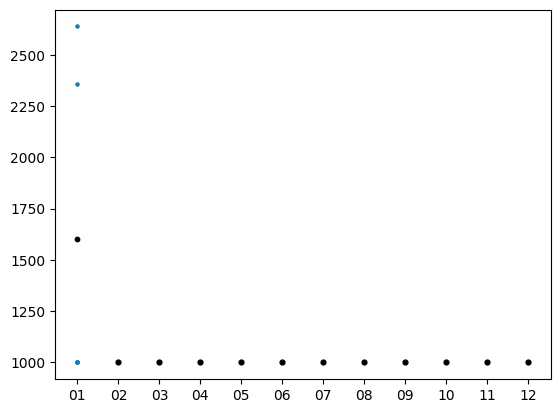

In [19]:
final_capital = [fixed_results[month]["final_capital"] for month in fixed_results.keys() if "01_" in month]
plt.scatter(["01"] * len(final_capital), final_capital, s=5)
plt.scatter(["01"], np.mean(final_capital), c="k", s=10)

for i, month in enumerate(list(fixed_results.keys())):
    if "01_" in month:
        continue
    metrics = fixed_results[month]["fold_metrics"]
    final_capital = [metrics[idx]["final_capital"] for idx in range(len(metrics))]
    if not len(final_capital):
        plt.scatter([month], [1000], c="w", s=12)
        continue
    final_capital_mean = np.mean(final_capital)
    plt.scatter([month] * len(metrics), final_capital, s=5)
    plt.scatter([month], [final_capital_mean], c="k", s=12)

In [7]:
all_months = ["01"] + MONTHS_NUMBERS

In [29]:
with open("data/experiments_moving_training_20250501002721.pkl", "rb") as f:
    moving_results = pickle.load(f)

In [27]:
moving_results["01"].keys()

dict_keys(['fold_metrics', 'fold_capitals', 'trades_df'])

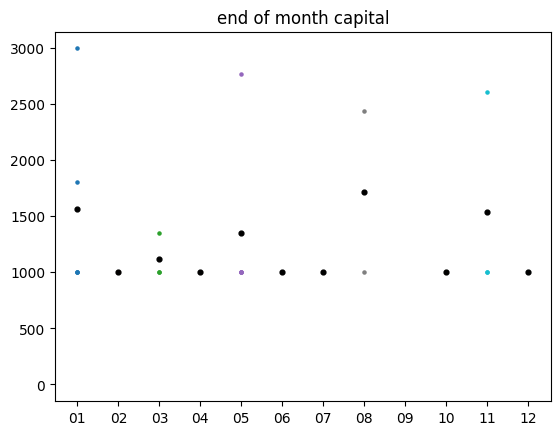

In [40]:
all_capital_avgs = []
for month in list(moving_results.keys()):
    final_capital = moving_results[month]["fold_metrics"]
    if not len(final_capital):
        plt.scatter([month], [0], c="w", s=12)
        continue
    final_capital_mean = np.mean(final_capital)
    plt.scatter([month] * len(final_capital), final_capital, s=5)
    plt.scatter([month], [final_capital_mean], c="k", s=12)
    plt.title("end of month capital")
    all_capital_avgs.append(final_capital_mean)

In [ ]:
with open("data/experiments_moving_training_compound_20250501045402.pkl", "rb") as f:
    moving_compound_results = pickle.load(f)

In [61]:
all_capital_avgs = []
for month in list(moving_compound_results.keys()):
    final_capital = moving_compound_results[month]["fold_metrics"]
    if not len(final_capital):
        plt.scatter([month], [0], c="w", s=12)
        continue
    final_capital_mean = np.mean(final_capital)
    plt.scatter([month] * len(final_capital), final_capital, s=5)
    plt.scatter([month], [final_capital_mean], c="k", s=12)
    plt.title("end of month capital")
    all_capital_avgs.append(final_capital_mean)

TypeError: object of type 'float' has no len()

In [116]:
with open("data/experiments_moving_training_compound_20250505172553.pkl", "rb") as f:
    moving_compound_results = pickle.load(f)

In [123]:
moving_compound_results.keys()#[month]["y_pred_proba"]

dict_keys(['10', '11', '12'])

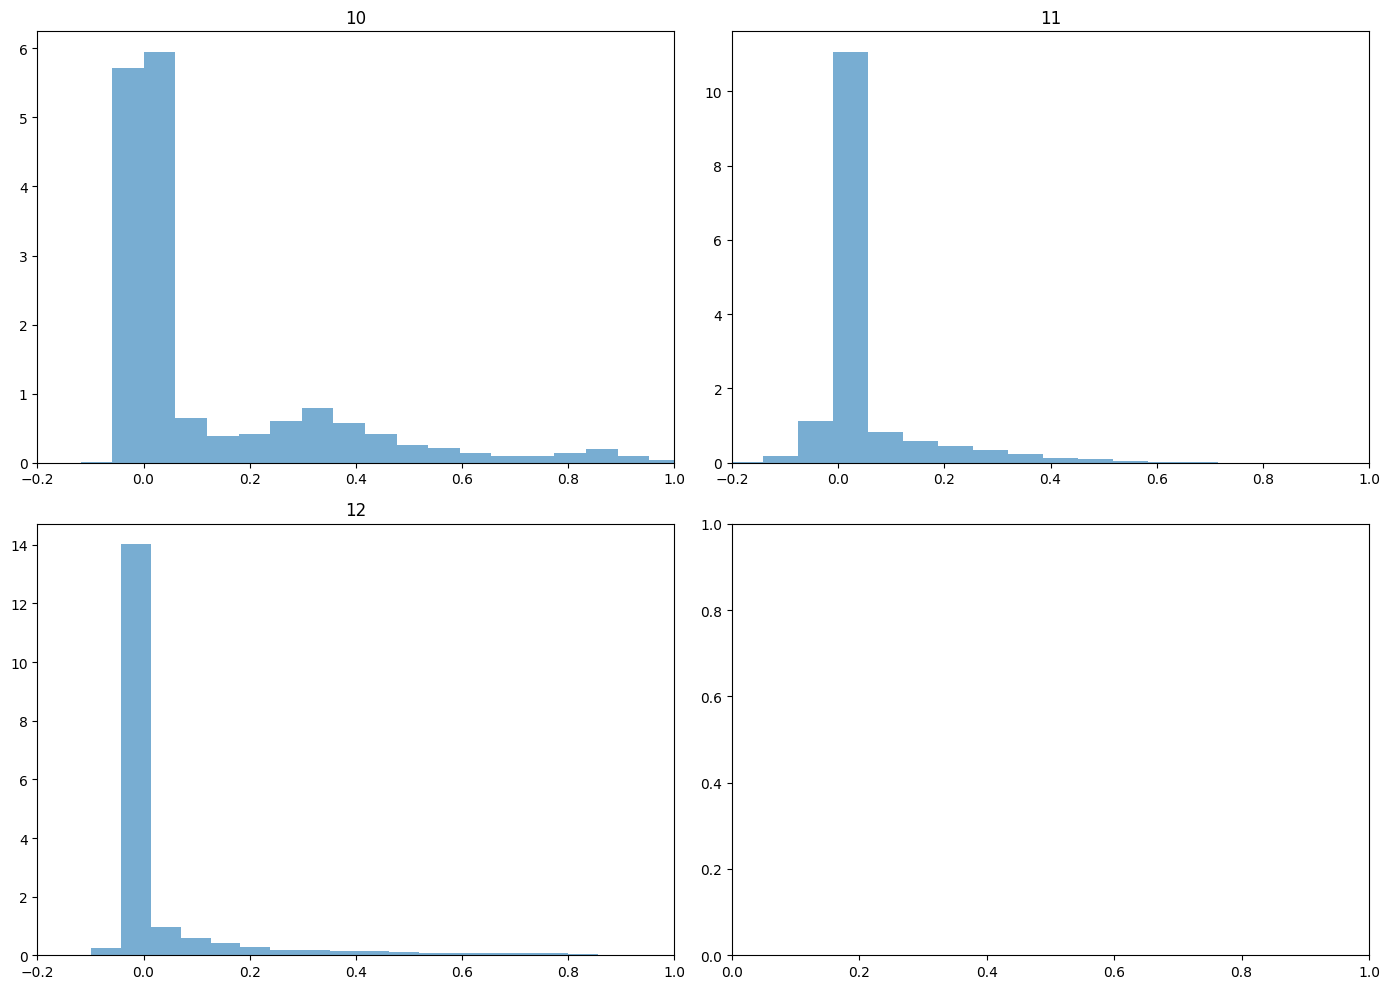

In [128]:
nb_rows = 2
fig, ax = plt.subplots(
    nb_rows,
    len(list(moving_compound_results.keys())) // nb_rows + len(list(moving_compound_results.keys())) % nb_rows,
    figsize=(14, 10)
)

for idx, month in enumerate(moving_compound_results):
    row = idx // (len(list(moving_compound_results.keys())) // nb_rows + len(list(moving_compound_results.keys())) % nb_rows)
    col = idx % (len(list(moving_compound_results.keys())) // nb_rows + len(list(moving_compound_results.keys())) % nb_rows)
    # if month != "09":
    if month in ("10", "11", "12"):
        ax[row][col].hist([proba for proba in moving_compound_results[month]["y_pred_proba"] if proba != 0.0], bins=20, alpha=0.6, density=True)
        ax[row][col].set_xlim((-0.2, 1))
        ax[row][col].set_title(month)
plt.tight_layout()

In [95]:
for month in moving_compound_results.keys():
    print(
        moving_compound_results[month]["best_threshold"], moving_compound_results[month]["best_precision"]
    )


0.8900000000000001 1.0
0.81 1.0
0.9400000000000002 0.9950900163666121
0.9400000000000002 0.9559859154929577
0.9300000000000002 0.9884169884169884
0.9400000000000002 0.9576191960112185
0.9100000000000001 1.0
0.7 1.0
None None
0.8600000000000001 0.012164216928535226
0.76 1.0
0.8 0


01 1087.9999995231628
02 1551.9961016252637
03 4474.042935855687
04 6407.960906086373
05 10888.3066309485
06 15895.7362534813
07 16121.724531745713
08 17549.724522179167
09 None
10 783.7243817208218
11 2133.6755543699837
12 1053.6755606284714


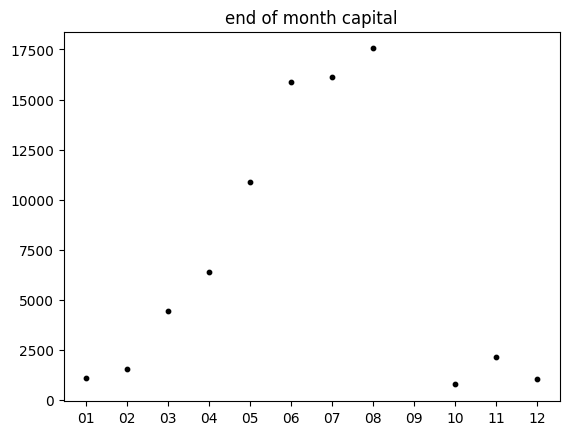

In [93]:
# all_capital_avgs = []
for month in list(moving_compound_results.keys()):
    # print(month)
    final_capital = moving_compound_results[month]["fold_metrics"]
    if isinstance(final_capital, (list, tuple)) and len(final_capital) == 0:
        plt.scatter([month], [0], c="w", s=12)
        continue
    # final_capital_mean = np.mean([final_capital])
    print(month, final_capital)
    plt.scatter([month], [final_capital], c="k", s=10)
    # plt.scatter([month], [final_capital_mean], c="k", s=12)
    plt.title("end of month capital")
    # all_capital_avgs.append(final_capital_mean)

In [ ]:
We need to assess te capital gain leaving a gap of a week for testing
This means if the last training point date is 10/01, we must start testing
from 10/01 plus 1 week. This is, because irl we cannot always train with
data from yesterday to predict data from today since we need time to 
notice whether it is going to be a good trade and assign label 1 to it.
In other words, the test must start as early on the date of the most recent
datapoint with label 1 plus the time it took to for the gain to realize plus
16 data points. If the datetime is already after this delta, we keep the normal
time series split. This means that we might lose some data points from the
dataset during test, but it's ok